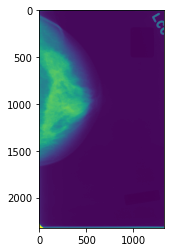

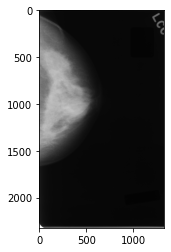

In [20]:
import numpy as np
import filetype
import matplotlib.pyplot as plt
import os
import cv2

DATADIR= "C:/Users/moham/Desktop/archivez/MINI-DDSM-Complete-PNG-16/"
CATEGORIES = ["Benign","Cancer","Normal"]

for category in CATEGORIES:
    patientNos = os.path.join(DATADIR, category)#path to the benign/cancer/normal dir
    for patientNo in os.listdir(patientNos):
        p_file_nm = os.path.join(patientNos,patientNo)
        for img in os.listdir(p_file_nm):
            path=os.path.join(p_file_nm,img)
            if filetype.is_image(path):
                if not (img.endswith("Mask.jpg") or img.endswith("MASK2.jpg")):
                    img_array = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
                    img_array1 = cv2.imread(path)
                    plt.imshow(img_array, cmap='grey')
                    plt.show()
                    plt.imshow(img_array1)
                    plt.show()
                else:
                    continue
            else:
                continue
            break
        break
    break

In [3]:
print(img_array.shape)

(2324, 1336)


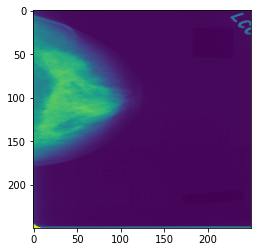

In [4]:
import numpy as np
import filetype
import matplotlib.pyplot as plt
import os
import cv2


IMG_SIZE=250

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE,))
plt.imshow(new_array)

In [38]:
import numpy as np
import filetype
import matplotlib.pyplot as plt
import os
import cv2
import shutil

DATADIR= "C:/Users/moham/Desktop/archivez/MINI-DDSM-Complete-PNG-16/"
CATEGORIES = ["Benign","Cancer","Normal"]
IMG_SIZE=250
training_data = []

def create_training_data():
    count=0
    for category in CATEGORIES:
        patientNos = os.path.join(DATADIR, category)#path to the benign/cancer/normal dir
        class_num = CATEGORIES.index(category)
        for patientNo in os.listdir(patientNos):
            p_file_nm = os.path.join(patientNos,patientNo)
            for img in os.listdir(p_file_nm):
                path=os.path.join(p_file_nm,img)
                if filetype.is_image(path):
                    if not (img.endswith("Mask.png") or img.endswith("MASK2.png") or img.endswith("Mask2.png")):
                        print (path)
                        try:
                            if class_num == 0:
                                shutil.copy(path, 'C:/Users/moham/Desktop/breast cancer dataset/Benign')
                            elif class_num == 1:
                                shutil.copy(path, 'C:/Users/moham/Desktop/breast cancer dataset/Cancer')
                            else:
                                shutil.copy(path, 'C:/Users/moham/Desktop/breast cancer dataset/Normal')
                            # img_array = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                            # new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                            # training_data.append([new_array, class_num])
                        except Exception as e:
                            print (e)
                            pass
                    else:
                        continue
                else:
                    continue
            count+=1
            print (count)

create_training_data()

C:/Users/moham/Desktop/archivez/MINI-DDSM-Complete-PNG-16/Benign\0029\C_0029_1.LEFT_CC.png
C:/Users/moham/Desktop/archivez/MINI-DDSM-Complete-PNG-16/Benign\0029\C_0029_1.LEFT_MLO.png
C:/Users/moham/Desktop/archivez/MINI-DDSM-Complete-PNG-16/Benign\0029\C_0029_1.RIGHT_CC.png
C:/Users/moham/Desktop/archivez/MINI-DDSM-Complete-PNG-16/Benign\0029\C_0029_1.RIGHT_MLO.png
1
C:/Users/moham/Desktop/archivez/MINI-DDSM-Complete-PNG-16/Benign\0033\C_0033_1.LEFT_CC.png
C:/Users/moham/Desktop/archivez/MINI-DDSM-Complete-PNG-16/Benign\0033\C_0033_1.LEFT_MLO.png
C:/Users/moham/Desktop/archivez/MINI-DDSM-Complete-PNG-16/Benign\0033\C_0033_1.RIGHT_CC.png
C:/Users/moham/Desktop/archivez/MINI-DDSM-Complete-PNG-16/Benign\0033\C_0033_1.RIGHT_MLO.png
2
C:/Users/moham/Desktop/archivez/MINI-DDSM-Complete-PNG-16/Benign\0217\C_0217_1.LEFT_CC.png
C:/Users/moham/Desktop/archivez/MINI-DDSM-Complete-PNG-16/Benign\0217\C_0217_1.LEFT_MLO.png
C:/Users/moham/Desktop/archivez/MINI-DDSM-Complete-PNG-16/Benign\0217\C_0217_

In [1]:
import tensorflow as tf



physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))

Num GPUs Available:  1


In [ ]:
print(len(training_data))

In [ ]:
print(training_data[1])

In [22]:
import random

random.shuffle(training_data)

In [23]:
X = []
y = []


In [24]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE, 1)
y=np.array(y)

In [25]:
print(len(y))
print(len(X))

7954
7954


In [26]:
import pickle
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

pickle_out = open("X_train.pickle", "wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()


pickle_out = open("X_test.pickle", "wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("y_train.pickle", "wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

pickle_out = open("y_test.pickle", "wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()

In [27]:
print(X_train.shape)

(6363, 250, 250, 1)


In [11]:
print(X_test.shape)

(2175, 250, 250, 1)


In [4]:
import tensorflow as tf

import pickle

X_train= pickle.load(open("X_train.pickle","rb"))
y_train = pickle.load(open("y_train.pickle","rb"))


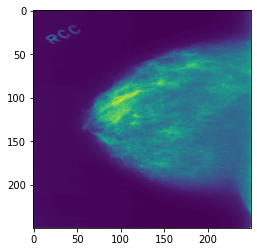

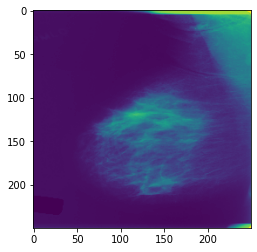

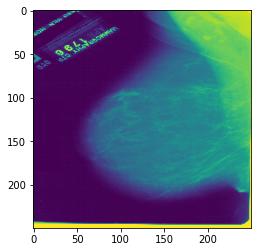

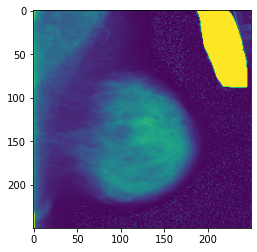

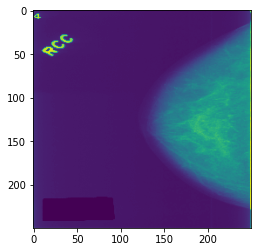

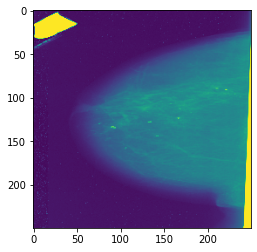

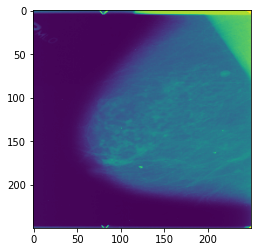

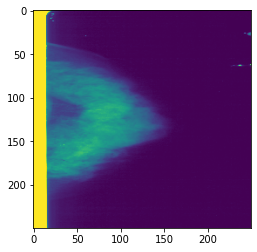

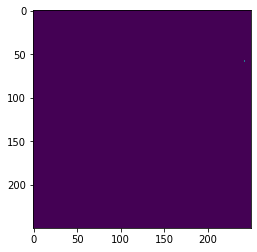

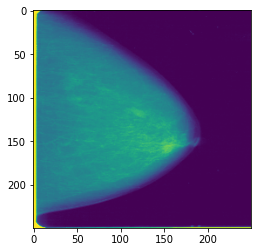

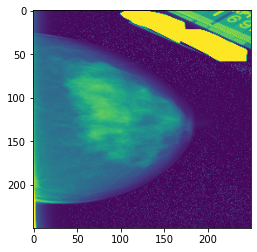

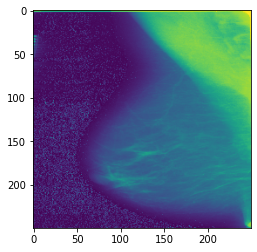

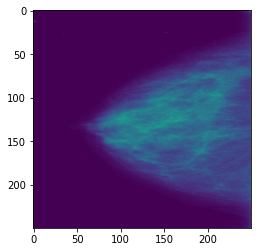

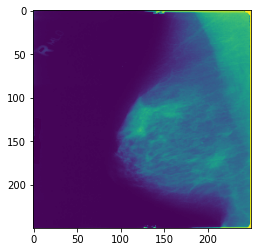

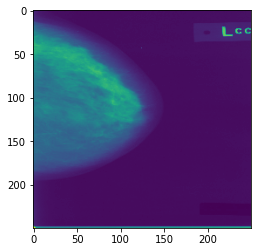

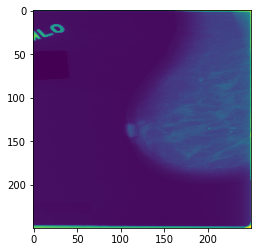

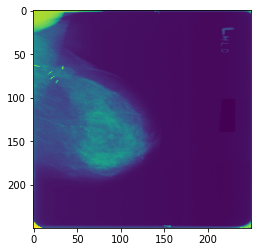

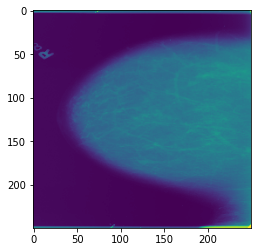

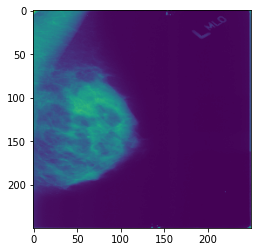

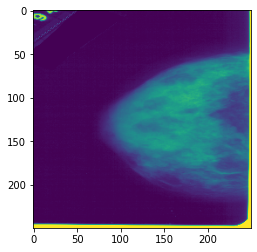

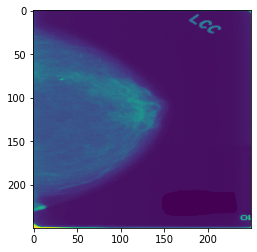

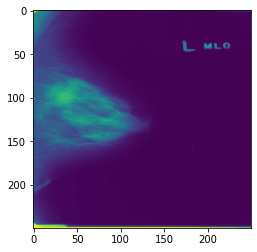

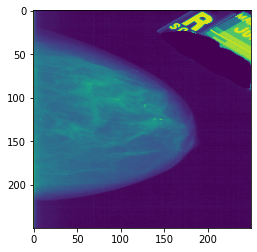

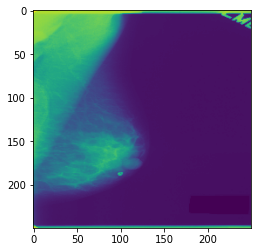

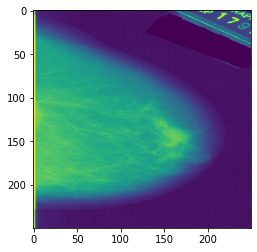

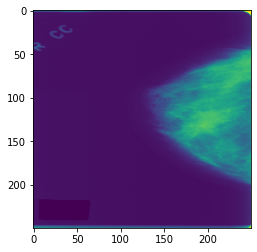

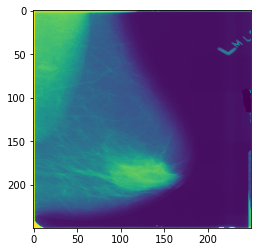

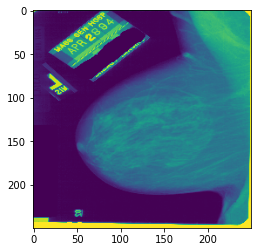

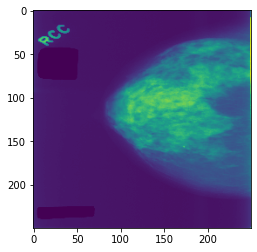

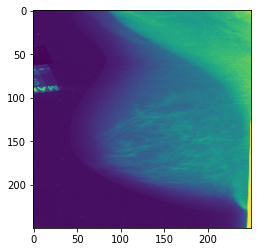

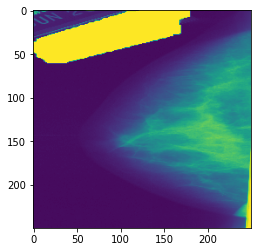

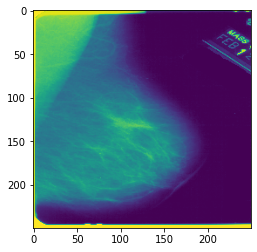

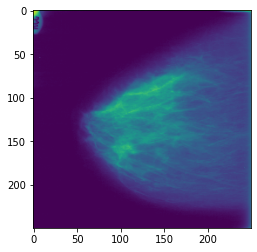

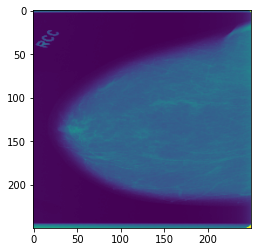

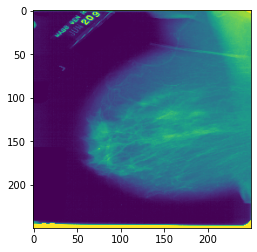

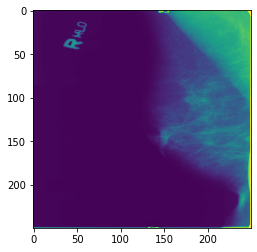

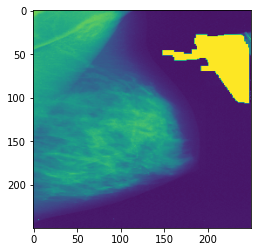

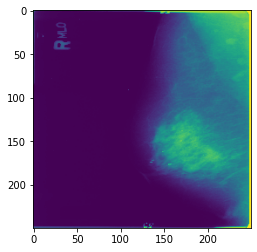

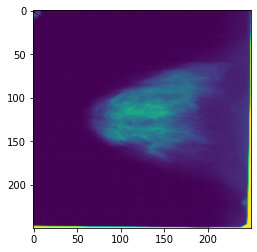

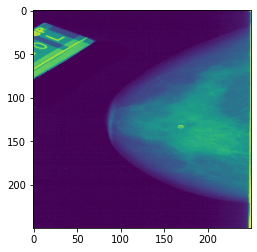

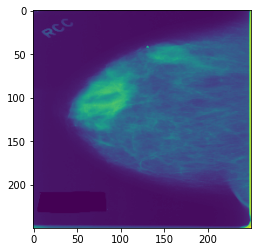

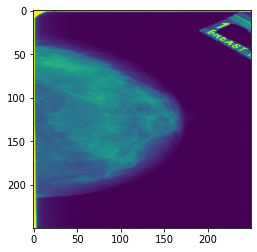

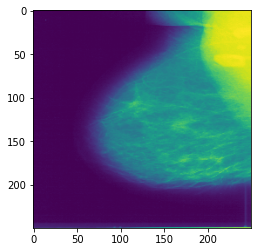

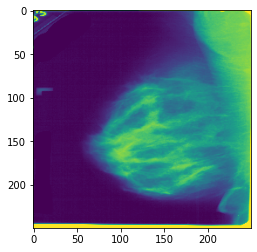

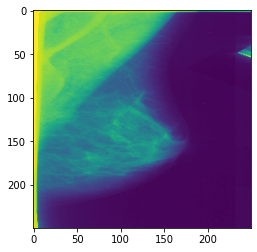

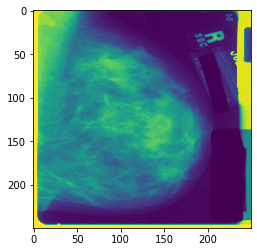

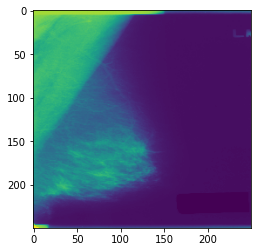

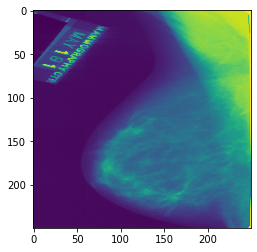

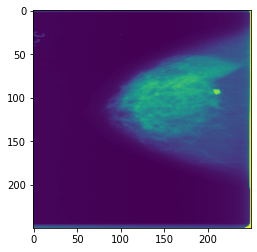

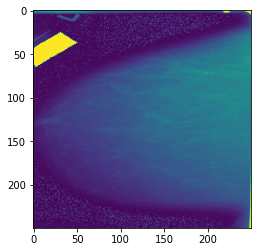

In [33]:
import matplotlib.pyplot as plt
for npimage in X_train[0:50]:
    plt.imshow(npimage)
    plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

X_train=X_train/255.0

model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(3))
model.add(Activation('sigmoid'))

model.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

In [10]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 248, 248, 64)      640       
_________________________________________________________________
activation_3 (Activation)    (None, 248, 248, 64)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 124, 124, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 122, 122, 64)      36928     
_________________________________________________________________
activation_4 (Activation)    (None, 122, 122, 64)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 238144)           

In [8]:
from tensorflow.keras.utils import normalize, to_categorical
X_train=X_train/255.0
y_train_cat = to_categorical(y_train)

In [7]:
print(y_train_cat[0])

[0. 1. 0.]


In [12]:
history=model.fit(X_train, y_train_cat, batch_size=32, validation_split=0.2, epochs=10)


Epoch 1/10
218/218 [==============================] - 20s 89ms/step - loss: 0.9487 - accuracy: 0.5371 - val_loss: 0.7827 - val_accuracy: 0.5724

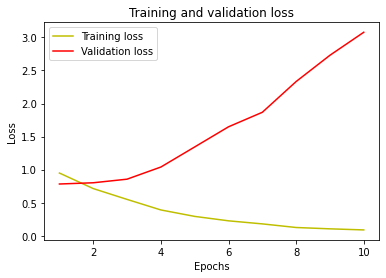

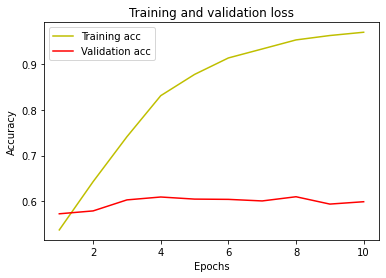

In [16]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs,loss,'y', label = "Training loss")
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs,acc,'y', label = "Training acc")
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
print(os.path)
model.save("C:/Users/moham/Desktop/MyDeepLearningProject/firstModel.h5")


<module 'ntpath' from 'C:\\Users\\moham\\AppData\\Local\\Programs\\Python\\Python39\\lib\\ntpath.py'>


In [4]:
from tensorflow.keras.models import load_model
model1=load_model("C:/Users/moham/Desktop/MyDeepLearningProject/firstModel.h5")
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 248, 248, 64)      640       
_________________________________________________________________
activation (Activation)      (None, 248, 248, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 124, 124, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 64)      36928     
_________________________________________________________________
activation_1 (Activation)    (None, 122, 122, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 238144)            0

TypeError: 'list' object is not callable

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import normalize, to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD, RMSprop

In [10]:
#Define Model with BatchNormalization and Dropout
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape = X_train.shape[1:]))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(3, activation='softmax'))

# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 250, 250, 32)      320       
_________________________________________________________________
batch_normalization_7 (Batch (None, 250, 250, 32)      128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 250, 250, 32)      9248      
_________________________________________________________________
batch_normalization_8 (Batch (None, 250, 250, 32)      128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 125, 125, 32)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 125, 125, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 125, 125, 64)     

In [11]:
history=model.fit(X_train, y_train_cat, batch_size=32, validation_split=0.2, epochs=30)

Epoch 1/30
157/157 [==============================] - 37s 197ms/step - loss: 1.0505 - accuracy: 0.5365 - val_loss: 4.9425 - val_accuracy: 0.3400

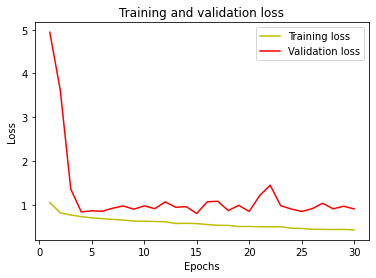

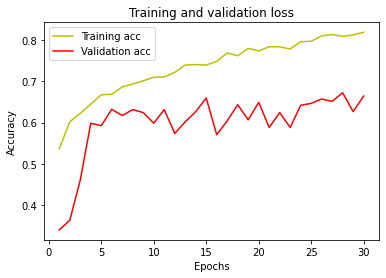

In [12]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs,loss,'y', label = "Training loss")
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs,acc,'y', label = "Training acc")
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()